<a href="https://colab.research.google.com/github/recanoy/Coursera_AlgorithmsForDNASequencing/blob/main/Week1_Homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Author: Raymart Jay E. Canoy
# Date: 14 October 2022
___ 

### Instructions:

* Implement a version of the naive exact algorithm that is strand-aware.
* Instead of looking only for occurrences of P in T, additionally look for occurrences of the *reverse complement* of P in T
* If the P and its reverse complement are identical, then a give match offset should be reported only once.

In [ ]:
## Common imports
import requests
import numpy as np

In [ ]:
## Common functions
# This funtion gets the file from the inputted URL
def get_file(FILEURL, FILENAME):
  req = requests.get(FILEURL)

  if req.status_code != 200: 
    raise Exception('Could not get file')
  

  with open(FILENAME, 'w') as handle:
    handle.write(req.text)

# This function loads the genome in the file
def load_genome(FILENAME):
  genome =  ''

  with open(FILENAME, 'r') as handle:
    for line in handle:
      if not line[0] == '>':
        genome += line.rstrip()

  return genome

# This function finds the complement of a given sequence
def find_complement(seq):
  # complement dictionary (N refers to undetermined nucleotide)
  comp_list = {'A': 'T', 'C' : 'G', 'G' : 'C', 'T' : 'A', 'N' : 'N'} 

  complement = ''.join([comp_list[val] for _ , val in enumerate(seq)])

  return complement

# This function finds the reverse complement of a given sequence
def find_reverseComplement(seq):
  # complement dictionary (N refers to undetermined nucleotide)
  comp_list = {'A' : 'T', 'C' : 'G', 'G' : 'C', 'T' : 'A', 'N' : 'N'}

  reverse_seq = seq[::-1]
  reverse_complement = ''.join([comp_list[val] for _ , val in enumerate(reverse_seq)])

  return reverse_complement
  
# This function performs a naive alignment
def naive(t, p):
  n = len(t)
  m = len(p)

  occurrences = []

  for i in range(n - m + 1): # looping through the position in t
    match = True             # match assumes that p is found in t
    for j in range(m):       # looping through the position in p
      if t[i+j] != p[j]:     # comparing each element if p with t
        match = False        # if one element doesn't match, set match to false and break
        break
      
    if match:                # if all element matches attach the position in occurrences
      occurrences.append(i)

  return occurrences

# This function performs a naive alignment of the reverse complement
def naive_rc(t, p):
  p_rev = find_reverseComplement(p)
  n = len(t)
  m = len(p_rev)

  occurrences = []

  for i in range(n - m + 1):
    match = True
    for j in range(m):
      if t[i+j] != p_rev[j]:
        match = False
        break
    
    if match:
      occurrences.append(i)
  
  return occurrences


# This function performa a naive alignment with reverse complement
def naive_with_rc(t, p):
  occurrences_p = naive(t, p)
  occurrences_p_rc = naive_rc(t, p)

  occurrences = [val for _ , val in enumerate(occurrences_p)]
  if len(occurrences_p_rc) > 0:
    for _ , val in enumerate(occurrences_p_rc):
      if any([val == elem for _ , elem in enumerate(occurrences)]):
        continue
      else:
        occurrences.append(val)

  return np.sort(occurrences)

In [ ]:
FILEURL = 'https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa'
FILENAME = 'lambda_virus.fa'
get_file(FILEURL, FILENAME)
lambda_genome = load_genome(FILENAME)
print(lambda_genome)

GGGCGGCGACCTCGCGGGTTTTCGCTATTTATGAAAATTTTCCGGTTTAAGGCGTTTCCGTTCTTCTTCGTCATAACTTAATGTTTTTATTTAAAATACCCTCTGAAAAGAAAGGAAACGACAGGTGCTGAAAGCGAGGCTTTTTGGCCTCTGTCGTTTCCTTTCTCTGTTTTTGTCCGTGGAATGAACAATGGAAGTCAACAAAAAGCAGCTGGCTGACATTTTCGGTGCGAGTATCCGTACCATTCAGAACTGGCAGGAACAGGGAATGCCCGTTCTGCGAGGCGGTGGCAAGGGTAATGAGGTGCTTTATGACTCTGCCGCCGTCATAAAATGGTATGCCGAAAGGGATGCTGAAATTGAGAACGAAAAGCTGCGCCGGGAGGTTGAAGAACTGCGGCAGGCCAGCGAGGCAGATCTCCAGCCAGGAACTATTGAGTACGAACGCCATCGACTTACGCGTGCGCAGGCCGACGCACAGGAACTGAAGAATGCCAGAGACTCCGCTGAAGTGGTGGAAACCGCATTCTGTACTTTCGTGCTGTCGCGGATCGCAGGTGAAATTGCCAGTATTCTCGACGGGCTCCCCCTGTCGGTGCAGCGGCGTTTTCCGGAACTGGAAAACCGACATGTTGATTTCCTGAAACGGGATATCATCAAAGCCATGAACAAAGCAGCCGCGCTGGATGAACTGATACCGGGGTTGCTGAGTGAATATATCGAACAGTCAGGTTAACAGGCTGCGGCATTTTGTCCGCGCCGGGCTTCGCTCACTGTTCAGGCCGGAGCCACAGACCGCCGTTGAATGGGCGGATGCTAATTACTATCTCCCGAAAGAATCCGCATACCAGGAAGGGCGCTGGGAAACACTGCCCTTTCAGCGGGCCATCATGAATGCGATGGGCAGCGACTACATCCGTGAGGTGAATGTGGTGAAGTCTGCCCGTGTCGGTTATTCCAAAATGCTGCTGGGTGTTTATGCCTACTTTATAGAGCATAA

### (01) How many times does AGGT or its reverse complement ACCT occur in lamb

In [ ]:
p1 = 'AGGT'
occur_seq = naive(lambda_genome, p1)
occur_seq_rc = naive_rc(lambda_genome, p1)
occur = naive_with_rc(lambda_genome, p1)
print('Seq:', occur_seq)
print('RC Seq:', occur_seq_rc)
print('Occurrences', occur)
print('The number of times AGGT and its reverse complement occur is %d' % len(occur))

Seq: [122, 302, 383, 555, 729, 921, 2403, 2688, 3163, 3254, 4312, 4646, 4917, 5069, 5162, 5192, 5685, 6315, 6507, 6585, 7397, 7715, 7822, 7987, 8103, 8121, 8296, 8762, 8986, 9621, 10419, 10836, 11196, 11205, 11919, 12183, 12489, 12994, 13090, 13163, 13346, 13415, 13516, 13562, 13747, 13816, 14384, 14621, 14758, 14953, 15068, 15421, 15611, 16165, 16195, 16234, 16702, 17104, 17131, 17410, 17437, 17776, 17939, 18554, 18736, 18856, 18914, 18955, 19035, 19313, 19470, 19591, 19836, 19950, 19983, 20067, 20492, 20802, 21158, 21243, 22052, 22384, 23507, 23936, 23967, 24598, 25181, 25197, 25230, 25384, 25773, 26196, 26442, 26579, 26656, 27367, 27456, 27525, 27588, 27784, 27963, 28325, 28835, 28979, 30003, 30315, 30919, 31622, 32984, 35148, 35190, 35703, 36481, 36622, 37004, 37046, 37366, 37576, 37589, 38033, 38200, 38482, 38652, 38720, 39675, 39684, 39831, 40407, 40425, 40430, 40801, 40818, 41157, 41190, 41267, 41720, 42266, 43692, 43866, 44111, 44165, 44705, 44738, 44792, 45036, 46864, 47103, 4

### (02) How many times does TTAA and its reverse complement occur in the lambda virus genome?

In [ ]:
p2 = 'TTAA'
occur2 = naive_with_rc(lambda_genome, p2)
print('The number of times "TTAA" occur in the lambda genome is %d' % len(occur2))

The number of times "TTAA" occur in the lambda genome is 195


### (03) What is the offset of the leftmost occurrence of ACTAAGT or its reverse complement in the lambda virus genome?

In [ ]:
p3 = 'ACTAAGT'
occur3 = naive_with_rc(lambda_genome, p3)
print('Lestmost occurrence is %d' % occur3[0])

Lestmost occurrence is 26028


### (04) What is thee offset of the leftmost occurrence of AGTCGA or its reverse complement in the lambda virus genome?

In [ ]:
p4 = 'AGTCGA'
occur4 = naive_with_rc(lambda_genome, p4)
print('Leftmost occurrence is %d' % occur4[0])

Leftmost occurrence is 450


### (05) Make a new version of the naive function called `naive_2mm` that allows up to 2 mismatches per occurrence

In [ ]:
def naive_2mm(t, p, mismatch=2):
  n = len(t)
  m = len(p)

  occurrences = []

  for i in range(n - m + 1):
    mismatch_count = 0
    for j in range(m):
      if t[i+j] != p[j]:
        mismatch_count += 1
      elif mismatch_count > mismatch:
        break

    if mismatch_count <= mismatch:
      occurrences.append(i)

  return occurrences

In [ ]:
p5 = 'TTCAAGCC'
occur5 = naive_2mm(lambda_genome, p5)
print('Number of times of occurrence with mismatch of 2 is %d' % len(occur5))

Number of times of occurrence with mismatch of 2 is 191


### (06) What is the offset of the leftmost occurrence of AGGAGGTT in the lambda virus genome when allowing up to 2 mismatches?

In [ ]:
p6 = 'AGGAGGTT'
occur6 = naive_2mm(lambda_genome, p6)
print('Leftmost occurrence with mismatch of 2 is %d' % occur6[0])

Leftmost occurrence with mismatch of 2 is 49


### (07) Human Genome
* Download and parse the provided FASTQ file containing real DNA sequencing reads derived from a human
* The file has many reads in it
  * Examine all of them together when answering this question
  * This dataset has something wrong in it: One of the sequencing cycles is poor quality

* Report which sequencing cycle has the problem
* Sequencing cycle: A particular offset in all the reads

In [ ]:
## Common imports
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
## Common Functions
def readFASTQ(filename):
  # This function extracts the information from a FASTQ file
  # 
  # Argument(s):
  # filename: FASTQ filename
  #
  # Output(s):
  # sequences: reads
  # qualities: base qualities

  sequences = []
  qualities = []

  with open(filename, 'r') as handle:
    while True:
      handle.readline()
      seq = handle.readline().rstrip()
      handle.readline()
      qual = handle.readline().rstrip()

      if len(seq) == 0:
        break
      else:
        sequences.append(seq)
        qualities.append(qual)

  return sequences, qualities

## Converting a base quality to Phred+33 ASCII-encoded quality 
def QToPhred33(Q):
  """
  This function converts a base quality to Phred+33 ASCII-encoded quality
  """
  return chr(Q+33)

## Converting a Phred+33 ASCII-encoeded quality to a base quality
def phred33ToQ(qual):
  """
  This function converts a Phred+33 ASCII-encoded quality to base quality
  """
  return ord(qual)-33

In [ ]:
FASTQ_URL = 'https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq'
FILENAME = 'ERR037900_1.first1000.fastq'
get_file(FASTQ_URL, FILENAME)

In [ ]:
reads, qualities = readFASTQ(FILENAME)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


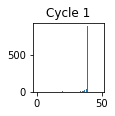

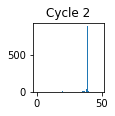

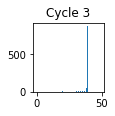

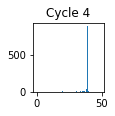

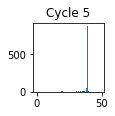

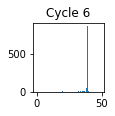

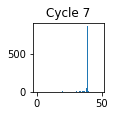

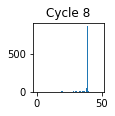

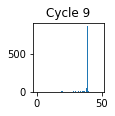

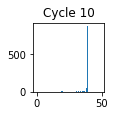

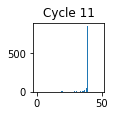

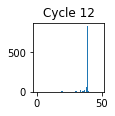

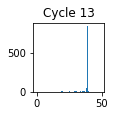

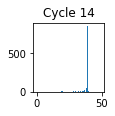

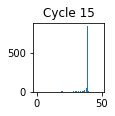

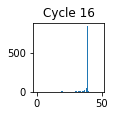

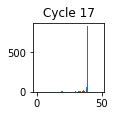

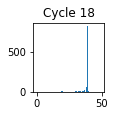

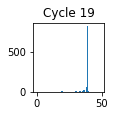

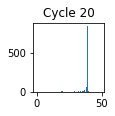

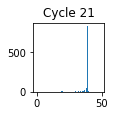

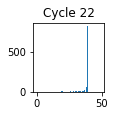

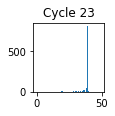

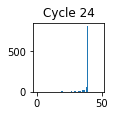

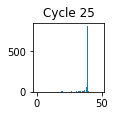

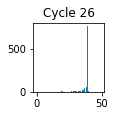

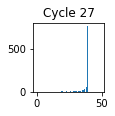

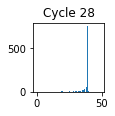

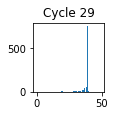

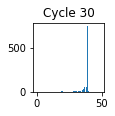

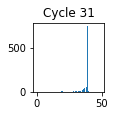

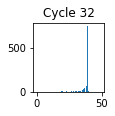

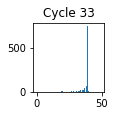

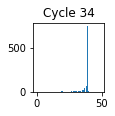

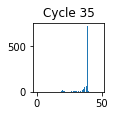

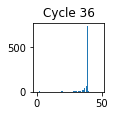

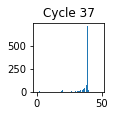

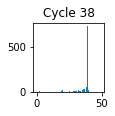

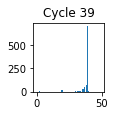

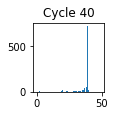

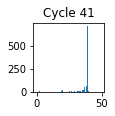

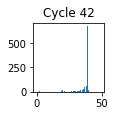

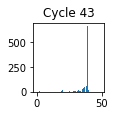

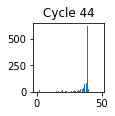

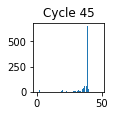

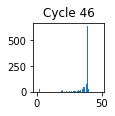

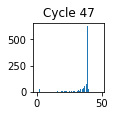

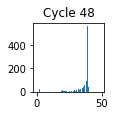

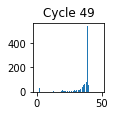

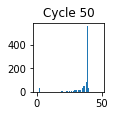

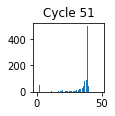

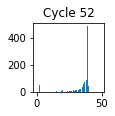

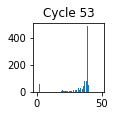

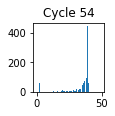

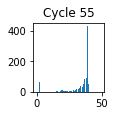

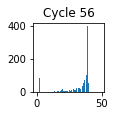

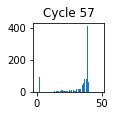

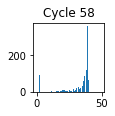

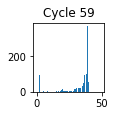

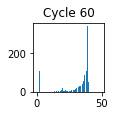

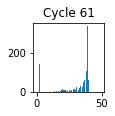

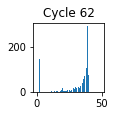

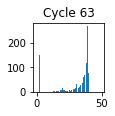

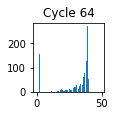

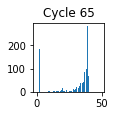

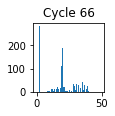

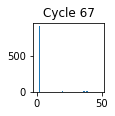

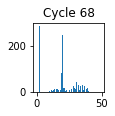

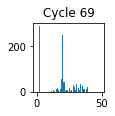

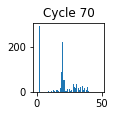

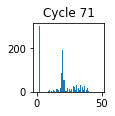

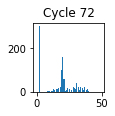

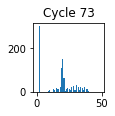

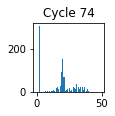

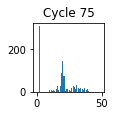

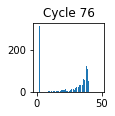

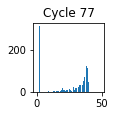

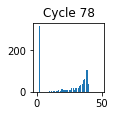

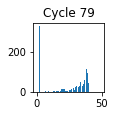

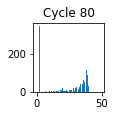

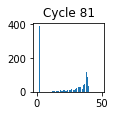

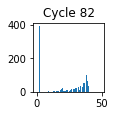

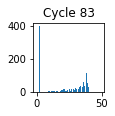

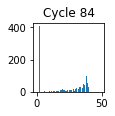

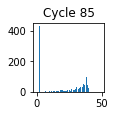

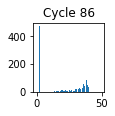

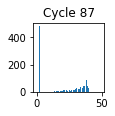

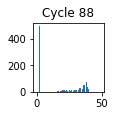

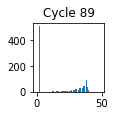

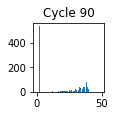

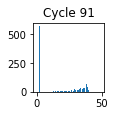

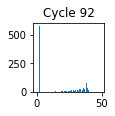

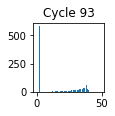

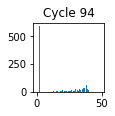

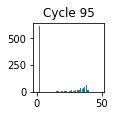

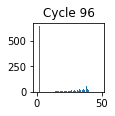

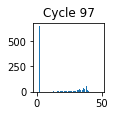

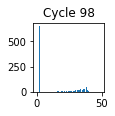

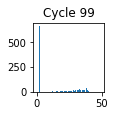

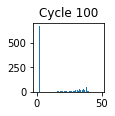

In [ ]:
#for cycle in range(100):
for cycle in range(100):
  bins = [0] * 50

  for quals in qualities:
    bins[phred33ToQ(quals[cycle])] += 1

  fig = plt.figure(figsize=(15,15))
  ax = fig.add_subplot(10,10, cycle+1)
  plt.bar(range(len(bins)), bins)
  ax.set_title('Cycle {cyc}'.format(cyc=cycle+1))
plt.show()

Erroneous cycle, (A GC percentage that is less than 3 std from the average gc percentage) is [66]


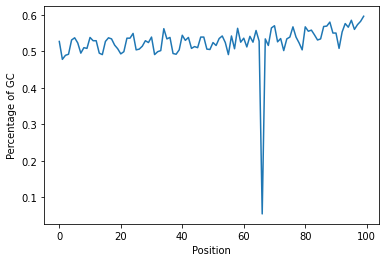

In [ ]:
def findGC(reads):
  gc = [0] * 100
  totals = [0] * 100

  for read in reads:
    for i in range(len(read)):
      if read[i] == 'G' or read[i] == 'C':
        gc[i] += 1

      totals[i] += 1

  for i in range(len(gc)):
    if totals[i] > 0:
      gc[i] /= totals[i]

  return gc

gc = findGC(reads)
gc_std = np.std(gc)
gc_ave = np.mean(gc)

erroneous_cycle = [cycle for cycle, gc_perc in enumerate(gc) if gc_perc < (gc_ave - 3*gc_std)]
print('Erroneous cycle, (A GC percentage that is less than 3 std from the average gc percentage) is', erroneous_cycle )

plt.plot(range(len(gc)), gc)
plt.xlabel('Position')
plt.ylabel('Percentage of GC')
plt.show()